In [5]:
!pip uninstall pandas-profiling

Uninstalling pandas-profiling-1.4.1:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/pandas_profiling-1.4.1.dist-info/*
    /usr/local/lib/python3.6/dist-packages/pandas_profiling/*
Proceed (y/n)? y
  Successfully uninstalled pandas-profiling-1.4.1


In [6]:
!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 256kB 2.8MB/s 
     |████████████████████████████████| 614kB 8.6MB/s 
     |████████████████████████████████| 61kB 5.3MB/s 
     |████████████████████████████████| 71kB 7.7MB/s 
     |████████████████████████████████| 3.1MB 14.6MB/s 
     |████████████████████████████████| 296kB 33.2MB/s 
  Created wheel for confuse: filename=confuse-1.1.0-cp36-none-any.whl size=17574 sha256=1508deda66c760d9c81dea67e5a786cc38f80d46e366350f868691c9400f3447
  Stored in directory: /root/.cache/pip/wheels/f6/8b/23/41a1b516f6d8d4cc81f5bdb55394a47cdbe9659c53668d3c9e
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=5cd5bdf6f782b8274fe8cbf638acd64f4bf85442b1a36e351a26e187982e3bf7
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291990 sha256=3532dffcdc70471d590dc77fb3754cf19a3204eea5d44222aa34a

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# Any results you write to the current directory are saved as output.

In [0]:
#matplotlib este folosit pentru a realiza grafice
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [0]:
df = pd.read_csv("/content/wine.csv")

In [4]:
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine Type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


pandas_profiling - o librărie ce oferă o analiză automată a setului de date: distributii, tipuri de variabile, valori și o serie intreaga de informatii aditionale.
Pentru a o putea folosi trebuie să ștergem libraria default din colab și să instalăm o versiune specifică. 
După instalare trebuie să facem restart la runtime.

In [5]:
from pandas_profiling import ProfileReport

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
prof=ProfileReport(df)

In [7]:
#Statisticile pot fi salvate În format html
prof.to_file(output_file='/content/output.html')

In [0]:
prof

In [0]:
#Pentru seturi de date mari este indicat să folosim versiunea minimală a librăriei
prof=ProfileReport(df,minimal=True)

In [9]:
prof.to_file(output_file='/content/output-min.html')

In [0]:
prof

In [0]:
#Selectăm datele de intrare in retea eliminand ultima coloană din csv
X = df.drop("Wine Type", axis=1)
#obținem etichetele pentru date salvand ultima coloana
y = df['Wine Type']

In [0]:
#folosim o functie din sklearn ce creaza seturi de date pentru antrenare si validare
from sklearn.model_selection import train_test_split

In [0]:
#primim ca output seturile de date corespunzatoare.
#Test size ne spune cat de mare procentual sa avem setul de validare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [14]:
#Verificam distributia etichetelor de 0 si 1.
#Suma etichetelor ne da numarul de intrari cu 1.
#Ideal ar trebui sa avem o distributie echilibrata intre cele 2 valori
sum(y_train), len(y_train)

(155.0, 142)

In [15]:
sum(y_test), len(y_test)

(35.0, 36)

In [0]:
#Pentru normalizarea datelor folosim MinMaxScaler din sklearn
from sklearn.preprocessing import MinMaxScaler

In [0]:
X_train

In [0]:
y_train

In [0]:
# Functia va translata fiecare feature in parte in intervalul (-1,1)
# Funcția practic relizează următoarele
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min


sc = MinMaxScaler((-1, 1))

In [0]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
X_test

In [0]:
len(X_train)

In [0]:
from torch.utils.data import Dataset, DataLoader

In [0]:
import torch
from torch import nn, optim

In [0]:
#Dataset - o clasă din PyTorch foarte utilă gestionării seturilor de date
class Dataset(Dataset):
    """ Diabetes dataset."""
    # Initialize your data, download, etc.
    def __init__(self, x, y):
        #Citim setul de date
        self.len = len(x)

        self.x=torch.tensor(x).float()
        self.y=torch.tensor(y.values).long()

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.len

In [0]:
trainDataset=Dataset(X_train, y_train)

In [23]:
trainDataset[0]

(tensor([-0.3105, -0.3241,  0.1765,  0.0722, -0.3913,  0.0897, -0.2532, -0.2075,
         -0.4322, -0.7406, -0.4797,  0.5458, -0.7478]), tensor(2))

In [0]:
trainLoader=DataLoader(dataset=trainDataset,
                        batch_size=32,
                        shuffle=True,
                        num_workers=1)

In [0]:
validationDataset=Dataset(X_test, y_test)

In [0]:
validationLoader=DataLoader(dataset=validationDataset,
                        batch_size=32,
                        shuffle=True,
                        num_workers=1)

In [0]:
class WineNN(nn.Module):
    def __init__(self):
        super(WineNN, self).__init__()

        #Sequential oferă o alternativă mai estetică a codului
        #Rețeaua noastră are 2 neuroni pentru output. 
        #Unul va prezice probabilitatea pentru cazul afirmativ al bolii, iar celălalt va prezice probabilitatea cazului negativ al bolii.
        self.sequential= nn.Sequential(
            nn.Linear(13,100),
            nn.ReLU(),
            nn.Linear(100, 60),
            nn.ReLU(),
            nn.Linear(60, 3)
        )


    def forward(self, x):
        return self.sequential(x)

In [0]:
net = WineNN()

In [0]:
optimizer = optim.SGD(net.parameters(), lr=0.01)
# CrossEntropyLoss este folosit adeseori in problemele de clasificare
# Acesta este compus din functia SoftMax și NLLLoss
# Softmax - Mapează elementele din Tensor in intervalul [0,1] și face ca suma lor să fie 1. O functie foarte utilă atunci cand vrem sa calculam probabilitati dintr-un Tensor.
# NLLLoss - negative log likelihood loss, functie folosită adeseori in problemele de clasificare
criterion = nn.CrossEntropyLoss()
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, verbose=True)

In [0]:
#Colectăm loss-urile din antrenare pentru a le plota ulterior
train_losses = []

In [0]:
# Colectăm accuratetea pentru a o plota ulterior
accuracies=[]

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
# Training loop
def train(epoch):
    # Setează câteva flaguri în rețeaua neurală. Specific activează Dropout-ul și BatchNormalization dacă este cazul.
    # În exemplul nostru are un rol pur demonstrativ, nefiind necesar.
    net.train()
    losses=[]
    for batch_idx, data in enumerate(trainLoader, 0):
      inputs, labels =data
      #Obținem predictii
      outputs = net(inputs)
      # Compute and print loss
      loss = criterion(outputs, labels)

      losses.append(loss.item())
      # Zero gradients, perform a backward pass, and update the weights.
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      print(f"[Train Epoch: {epoch}, Batch: {batch_idx+1}, Loss: {loss.item()}")
    mean_loss=sum(losses)/len(losses)
    scheduler.step(mean_loss)
    train_losses.append(mean_loss)
    print(f"[TRAIN] Epoch: {epoch} Loss:{mean_loss}")

In [0]:
# Colectăm loss-ul din validare pentru a o plota ulterior
test_losses=[]

In [0]:
def validation():
    #Pune pe off flagurile setate in model.train()
    #Din nou, în exemplul nostru e pur demonstrativ.
    net.eval()

    test_loss=[]
    correct = 0

    with torch.no_grad():
        for batch_idx, data in enumerate(validationLoader, 0):
          inputs, labels = data

          output=net(inputs)

          loss= criterion(output, labels)
          test_loss.append(loss.item())

          #Obținem predictiile pentru fiecare linie din setul de validare.
          #Practic ne returnează rezultatul cu cea mai mare probabilitate pentru fiecare intrare din setul de validare 
          pred = output.data.max(1, keepdim=True)[1]

          #Verificăm câte predicții sunt corecte și le însumăm numărul pentru a afla totalul de predicții corecte
          correct += pred.eq(labels.data.view_as(pred)).sum()
          current_correct=pred.eq(labels.data.view_as(pred)).sum()          
          print("============")
          print(f"[Validation set] Batch index: {batch_idx+1} Batch loss: {loss.item()}, Accuracy: {100. * current_correct/len(inputs)}%")
          print("============")
        mean_loss=sum(test_loss)/len(test_loss)
        test_losses.append(mean_loss)
        accuracy = 100. * correct/len(validationLoader.dataset)
        print(f"[Validation set] Loss: {mean_loss}, Accuracy: {accuracy}%")
          
        accuracies.append(accuracy)


In [36]:
#după fiecare epocă de train() verificăm rezultatele pe setul de validare
for epoch in range(100):
  train(epoch)
  validation()

[Train Epoch: 0, Batch: 1, Loss: 1.048607349395752
[Train Epoch: 0, Batch: 2, Loss: 1.0746381282806396
[Train Epoch: 0, Batch: 3, Loss: 1.1030256748199463
[Train Epoch: 0, Batch: 4, Loss: 1.075374722480774
[Train Epoch: 0, Batch: 5, Loss: 1.0817512273788452
[TRAIN] Epoch: 0 Loss:1.0766794204711914
[Validation set] Batch index: 1 Batch loss: 1.0949721336364746, Accuracy: 31.25%
[Validation set] Batch index: 2 Batch loss: 1.0258973836898804, Accuracy: 75.0%
[Validation set] Loss: 1.0604347586631775, Accuracy: 36.11111068725586%
[Train Epoch: 1, Batch: 1, Loss: 1.0587196350097656
[Train Epoch: 1, Batch: 2, Loss: 1.0839781761169434
[Train Epoch: 1, Batch: 3, Loss: 1.0639666318893433
[Train Epoch: 1, Batch: 4, Loss: 1.080275535583496
[Train Epoch: 1, Batch: 5, Loss: 1.0742475986480713
[TRAIN] Epoch: 1 Loss:1.0722375154495238
[Validation set] Batch index: 1 Batch loss: 1.0794950723648071, Accuracy: 37.5%
[Validation set] Batch index: 2 Batch loss: 1.1152503490447998, Accuracy: 25.0%
[Validat

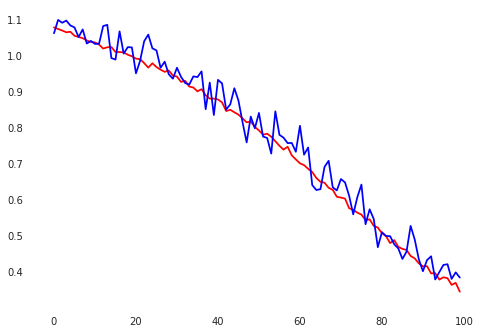

In [37]:
# Printăm comparativ cu roșu loss-ul de pe setul de validare și cu albastru loss-ul de pe setul de validare.
plt.plot(train_losses, "r-", test_losses, "b-")

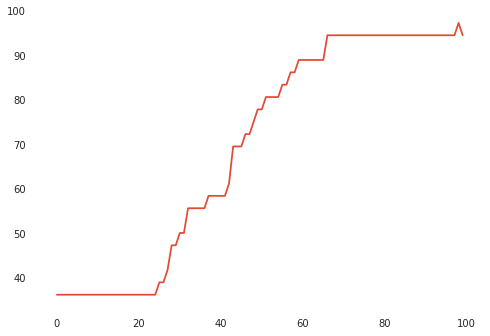

In [38]:
plt.plot(accuracies)

In [0]:
#Let's try and feed a single example in the neural network and see if it gets it right
def try_a_single_example_with_the_network(index_from_the_validation_set):
  with torch.no_grad():
    pred_test = net(validationDataset[index_from_the_validation_set][0].view(1, -1))
    _, preds_y = torch.max(pred_test, 1)
    return preds_y

In [0]:
index_of_test=30

In [41]:
print(f"Neural network response is: {try_a_single_example_with_the_network(index_of_test).item()}")
print(f"Actual response is: {validationDataset[index_of_test][1].view(-1).item()}")


Neural network response is: 0
Actual response is: 0
